<a href="https://colab.research.google.com/github/gstripling00/conferences/blob/main/course_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Data Analysis Framework

This section discussses the Course Data Analysis (CDA) Framework.

#Import Libraries, Load and Explore the Data

Import the necessary libraries, then load the cleaned dataset .csv file and begin to explore your data.

## Step 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


##Step 2. Load Data

In [2]:
#Load the dataset

df=pd.read_csv('/content/T-SCCE-I clean_data.csv')


##Step 3. Initial Data Exploration

# Charts and Visualizations


##Here are the list of Charts and Visualizations for the CDA Framework

*   CSAT Score Averages
*   Distribution of each numerical column
*   Distribution for lab and lecture quality CSAT scores
*   CSAT Score by Lab Quality
*   Count of each CSAT score
*   Top BiGrams in Feedback
*   Distribution for lab and lecture quality CSAT scores
*   CSAT Score by Lab Quality
*   Count of each CSAT score
*   Monthly CSAT Trends

Sentiment Charts:
*   CSAT Score by Lab Quality
*   Count of each CSAT score

And More!




##Initial Data Exploration

In [3]:
# Show first five rows

df.head()

,feedback_date,feedback_csat,feedback_csat_explanation,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_open_feedback,feedback_csat_materials,feedback_csat_lab_lecture_balance
0,2024-03-14,1.0,NaN,1.0,NaN,Skin zone Greg,NaN,NaN
1,2024-03-29,4.0,The UI for SCC is not very user friendly or in...,5.0,4.0,"I learn best by doing, so I would have preferr...",NaN,4.0
2,2024-03-30,5.0,satisfied with the knowledge,NaN,NaN,NaN,NaN,NaN
3,2024-04-01,5.0,NaN,4.0,NaN,NaN,NaN,NaN
4,2024-04-02,4.0,NaN,4.0,4.0,NaN,NaN,3.0


In [4]:
# Show the last five rows of the DataFrame

df.tail()

,feedback_date,feedback_csat,feedback_csat_explanation,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_open_feedback,feedback_csat_materials,feedback_csat_lab_lecture_balance
84,2024-09-08,4.0,N.A,4.0,4.0,N.A.,NaN,3.0
85,2024-09-09,4.0,"Give me a basic background, I hope it will giv...",2.0,4.0,More labs to gain hands-on experience.,NaN,3.0
86,2024-09-15,4.0,NaN,4.0,4.0,NaN,NaN,3.0
87,2024-09-17,3.0,NaN,3.0,3.0,NaN,NaN,3.0
88,2024-10-03,3.0,NaN,4.0,4.0,NaN,NaN,3.0


In [5]:
# Show information about the Data.

# IMPORTANT:
#Check the data type. Feedback_data should be a integer not an object. We will fix that later.
#Check the number of null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_date                      89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          29 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        20 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


You may not need the next step for cleaning column names for consistency or filling in null values (NaN) or converting the date column to datetime.

BUT, if you do, the code is available below. You can see that it works by now
looking at the datatype for the feedback_date after your run the cell.

In [6]:
# Clean column names for consistency
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('__', '_')

# Fill NaN for feedback text columns and convert date column to datetime
df['feedback_date'] = pd.to_datetime(df['feedback_date'], errors='coerce')
df['feedback_csat_explanation'] = df['feedback_csat_explanation'].fillna("No feedback")
df['feedback_csat_open_feedback'] = df['feedback_csat_open_feedback'].fillna("No feedback")



In [7]:
# Validate that the feedback_date was changed to datetime64.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   feedback_date                      89 non-null     datetime64[ns]
 1   feedback_csat                      88 non-null     float64       
 2   feedback_csat_explanation          89 non-null     object        
 3   feedback_csat_lab_quality          79 non-null     float64       
 4   feedback_csat_lecture_quality      80 non-null     float64       
 5   feedback_csat_open_feedback        89 non-null     object        
 6   feedback_csat_materials            0 non-null      float64       
 7   feedback_csat_lab_lecture_balance  80 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.7+ KB


<Axes: >

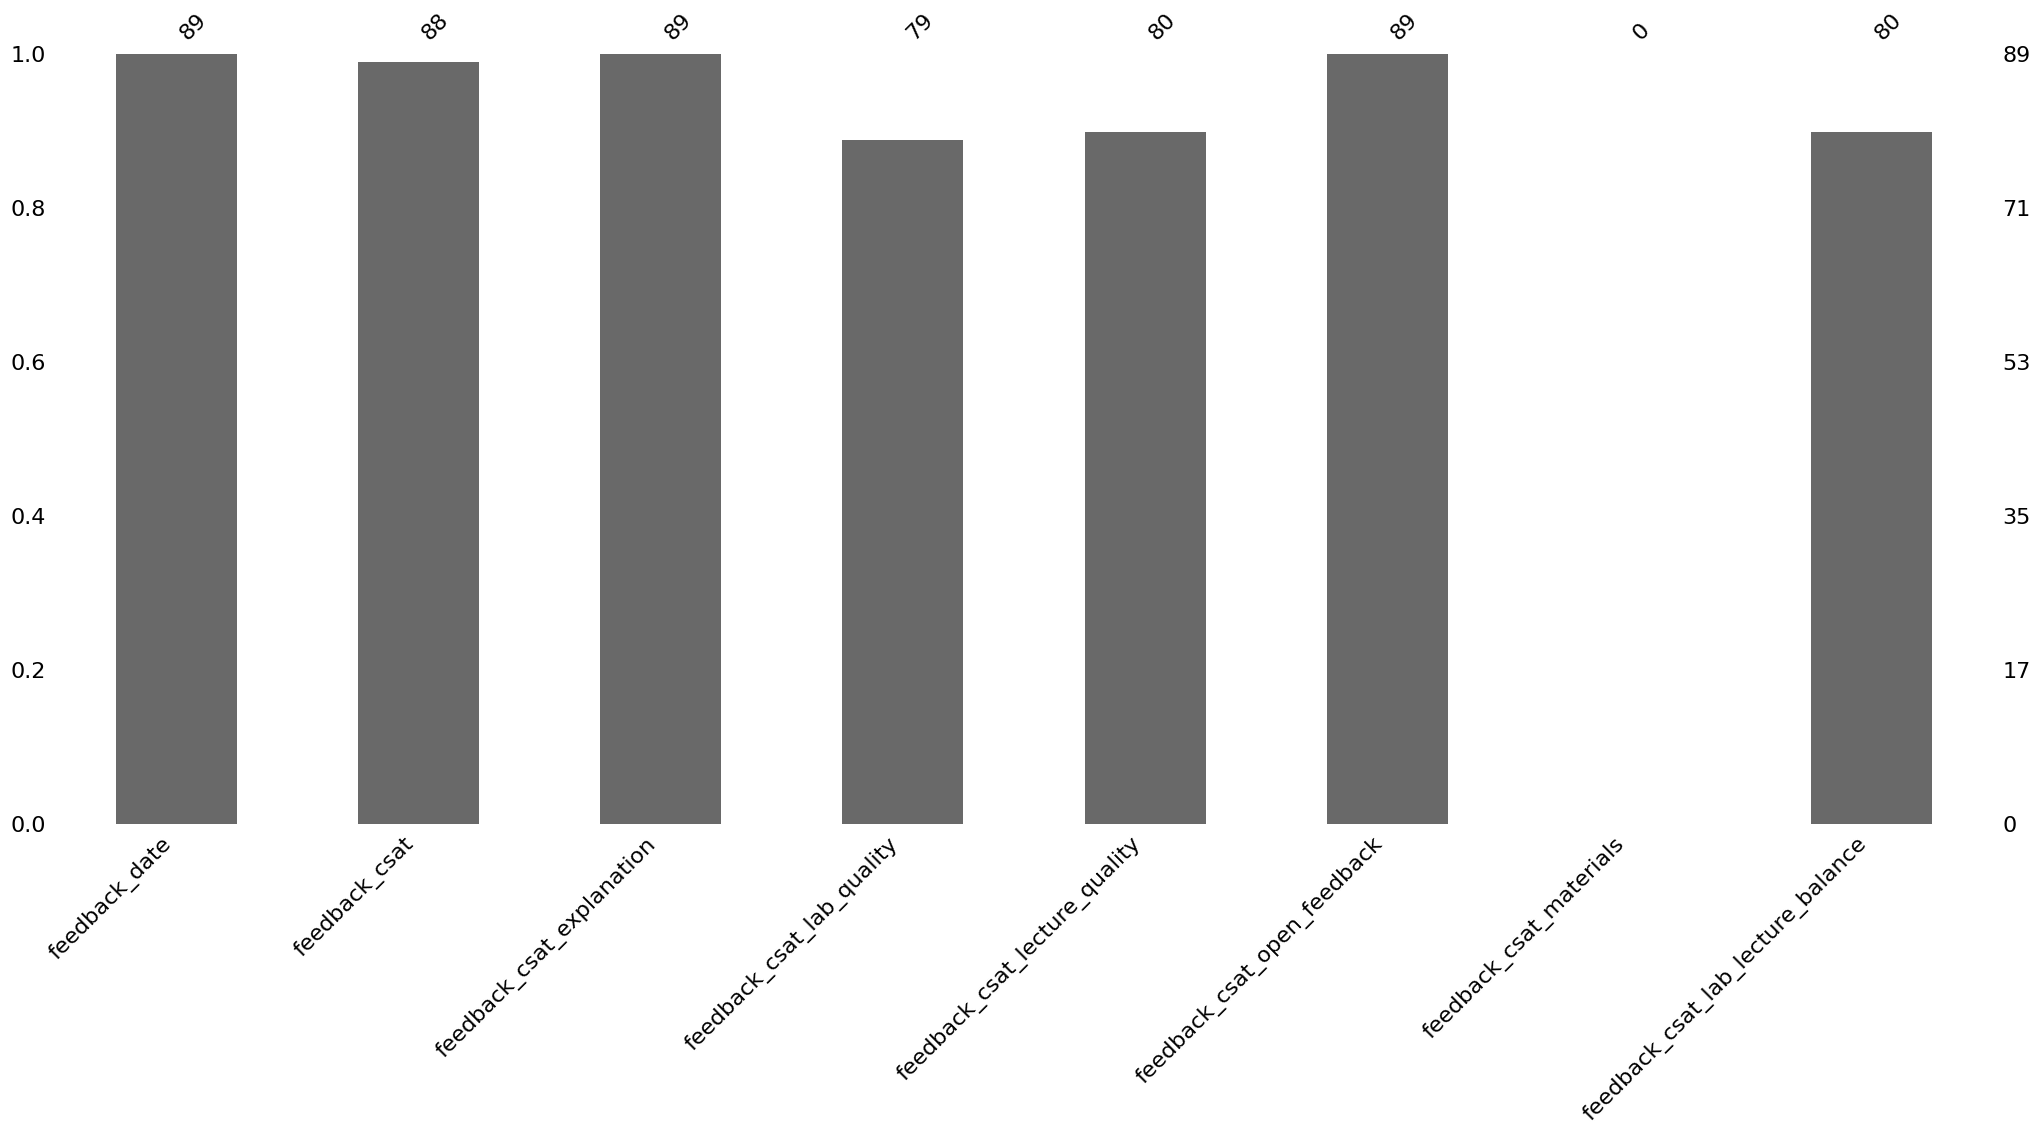

In [8]:
# Check for missing values.
# My data shows the feedback_csat_materials with no values. I am going to drop that feature column.

import missingno as msno
#msno.matrix(df)
msno.bar(df)

In [9]:
# Drop the 'feedback_csat_materials' column from the DataFrame
df = df.drop(columns='feedback_csat_materials')

#Validate that the feedback_csat_materials column is dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   feedback_date                      89 non-null     datetime64[ns]
 1   feedback_csat                      88 non-null     float64       
 2   feedback_csat_explanation          89 non-null     object        
 3   feedback_csat_lab_quality          79 non-null     float64       
 4   feedback_csat_lecture_quality      80 non-null     float64       
 5   feedback_csat_open_feedback        89 non-null     object        
 6   feedback_csat_lab_lecture_balance  80 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 5.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   feedback_date                      89 non-null     datetime64[ns]
 1   feedback_csat                      88 non-null     float64       
 2   feedback_csat_explanation          89 non-null     object        
 3   feedback_csat_lab_quality          79 non-null     float64       
 4   feedback_csat_lecture_quality      80 non-null     float64       
 5   feedback_csat_open_feedback        89 non-null     object        
 6   feedback_csat_lab_lecture_balance  80 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 5.0+ KB


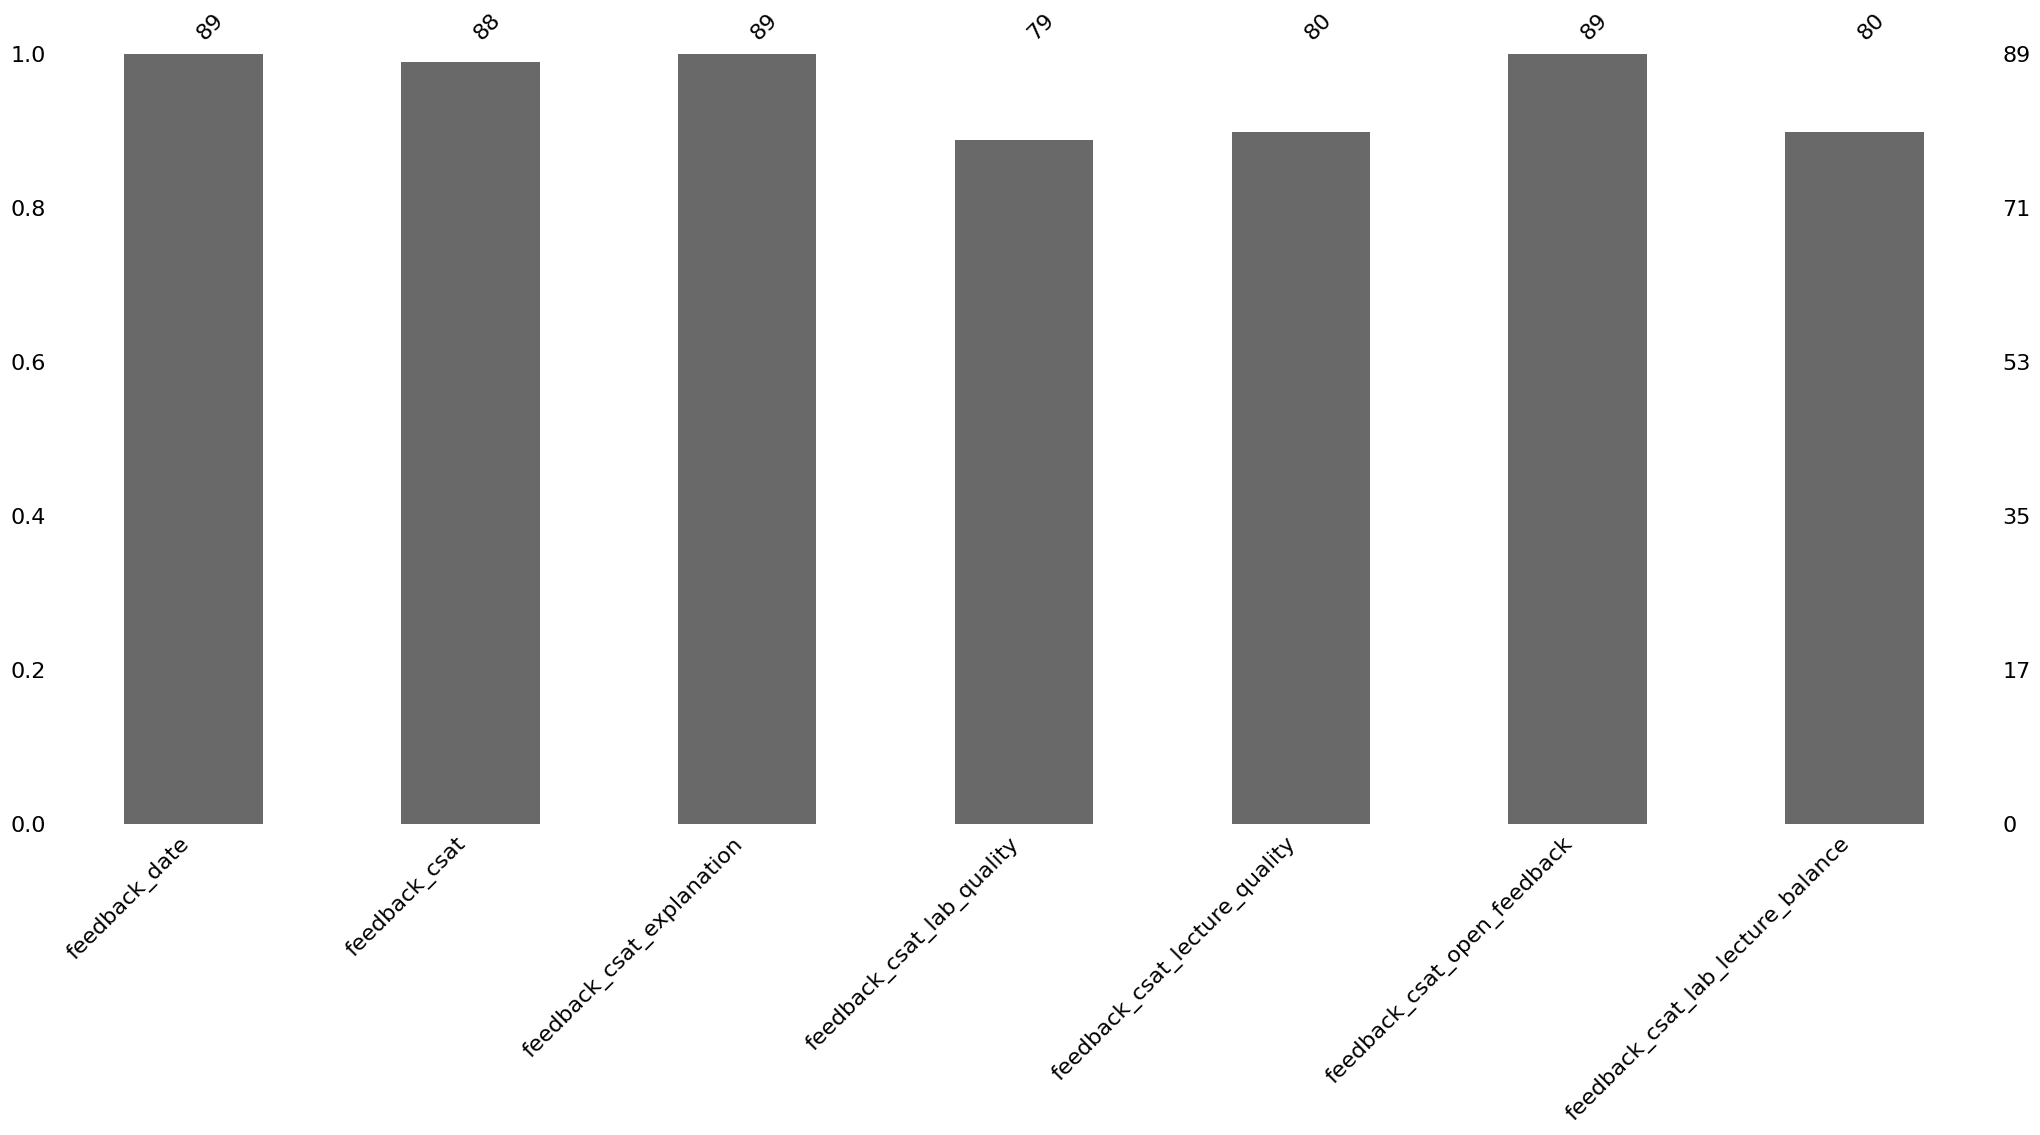

In [10]:
msno.bar(df)
df.info()

#Not many null values left in the dataframe.

#Data Visualization

##CSAT Score Averages

Average CSAT Scores:
 feedback_csat                        4.284091
feedback_csat_lab_quality            4.265823
feedback_csat_lecture_quality        4.325000
feedback_csat_lab_lecture_balance    3.250000
dtype: float64


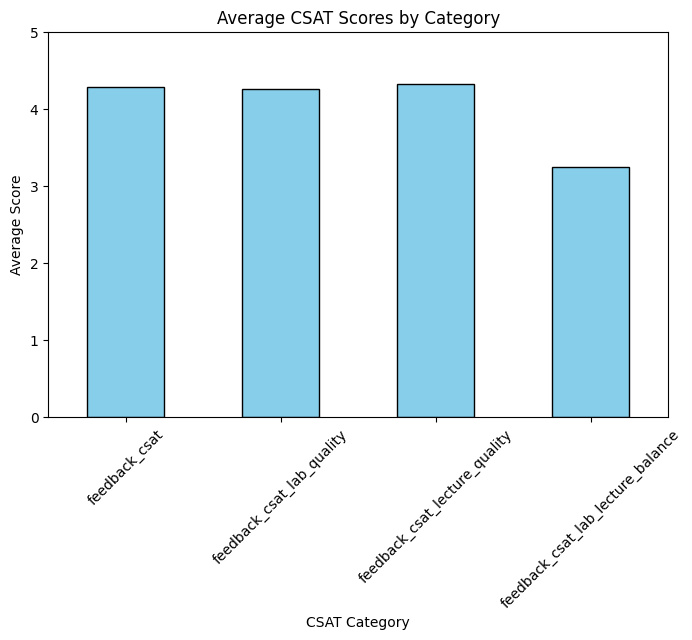

In [12]:
# Calculate average CSAT scores for each column
csat_columns = ['feedback_csat', 'feedback_csat_lab_quality', 'feedback_csat_lecture_quality', 'feedback_csat_lab_lecture_balance']
average_csats = df[csat_columns].mean()
print("Average CSAT Scores:\n", average_csats)


# Plotting the average CSAT scores as a bar chart
average_csats.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title('Average CSAT Scores by Category')
plt.xlabel('CSAT Category')
plt.ylabel('Average Score')
plt.ylim(0, 5)  # Assuming CSAT scores range from 1 to 5
plt.xticks(rotation=45)
plt.show()


##Bar Chart: Plotting the distribution of each numerical column

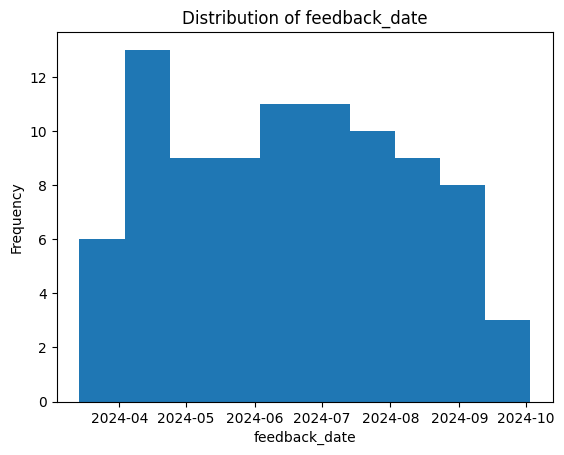

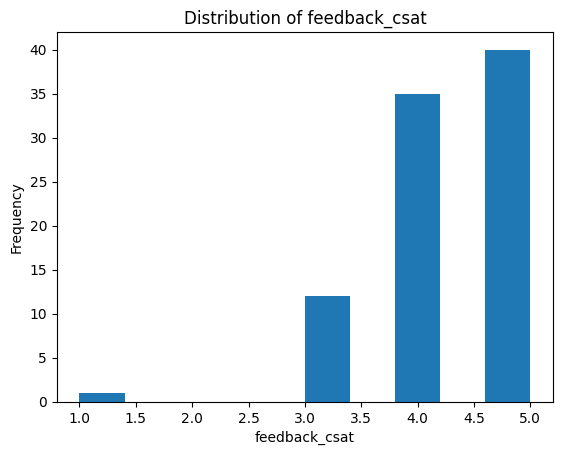

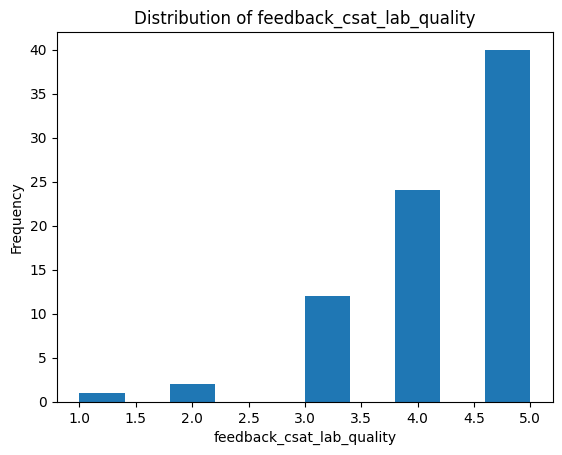

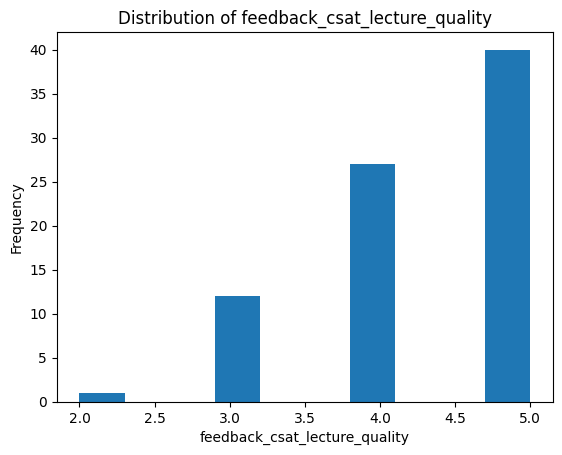

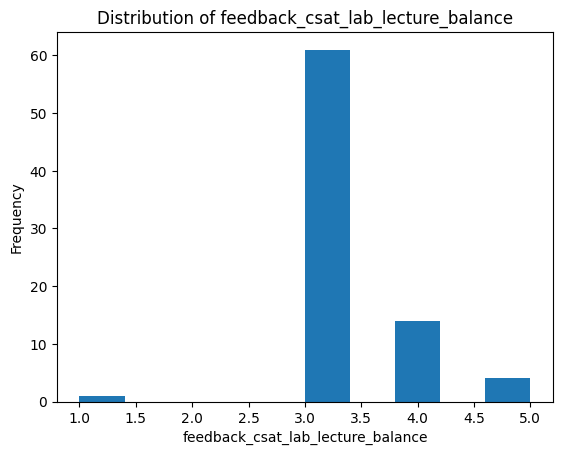

In [13]:
#Let's deal with Numeric NaNs

# Extracting numerical columns
numeric_columns = df.columns[df.dtypes != 'object']

# Plotting the distribution of each numerical column
for col in numeric_columns:
    # Remove NaN values before plotting
    data_to_plot = df[col].dropna()

    # Check if there's any data left to plot after removing NaN
    if len(data_to_plot) > 0:
        plt.hist(data_to_plot)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Skipping {col} as it contains only NaN values after cleaning.")



## Bar Chart: Plot distribution for lab and lecture quality CSAT scores

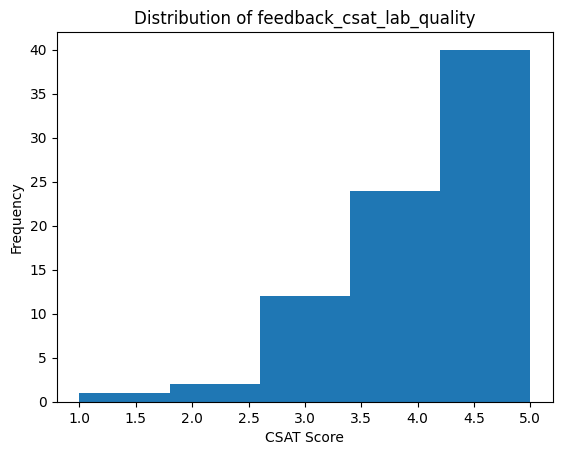

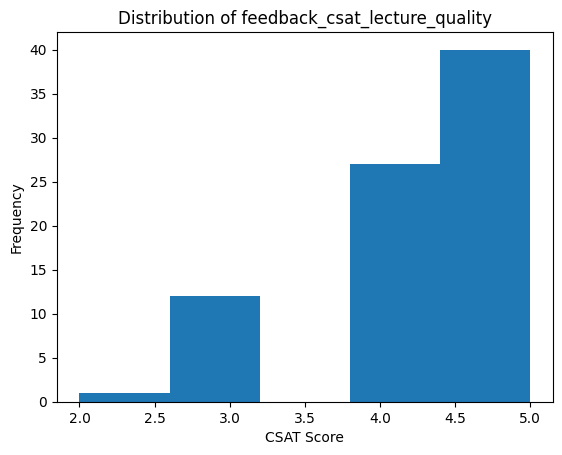

In [14]:
# Plot distribution for lab and lecture quality CSAT scores
for col in ['feedback_csat_lab_quality', 'feedback_csat_lecture_quality']:
    plt.figure()
    df[col].dropna().plot(kind='hist', bins=5, title=f'Distribution of {col}')
    plt.xlabel('CSAT Score')
    plt.ylabel('Frequency')
    plt.show()

##Correlation matrix (Heat Map)

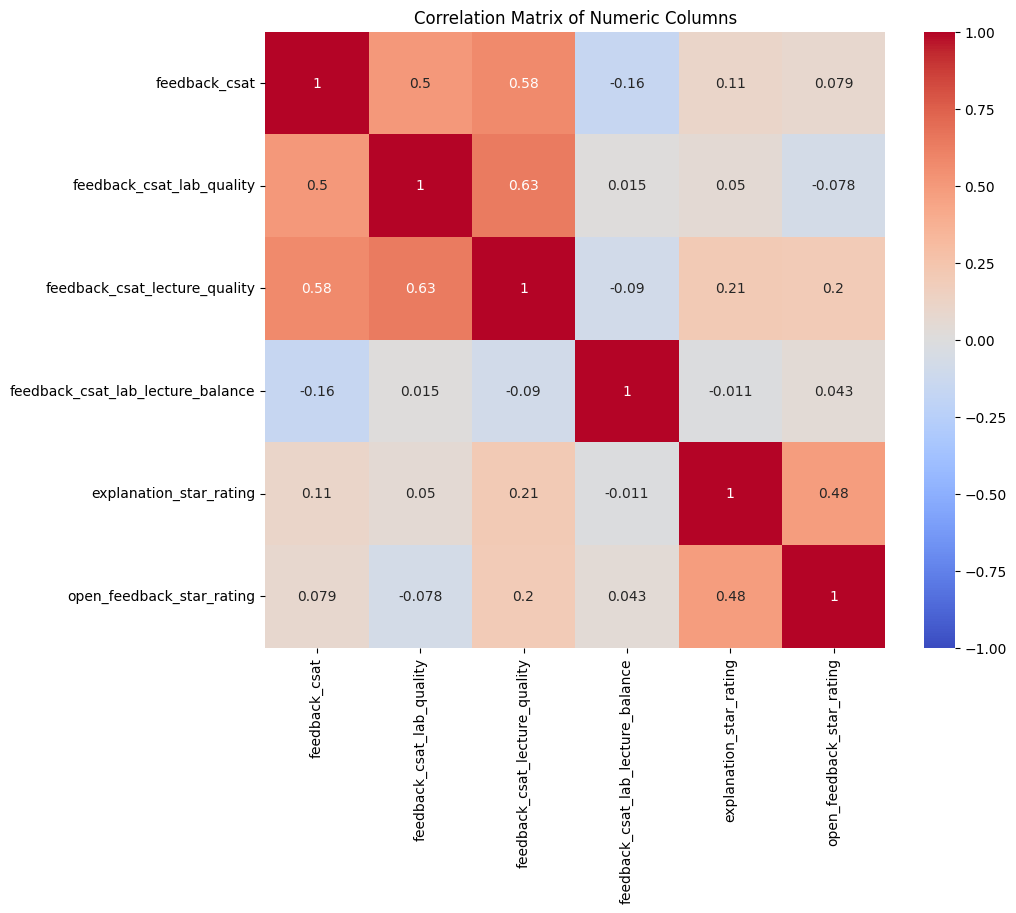

In [40]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

## Violin Plot CSAT Distribution by Category



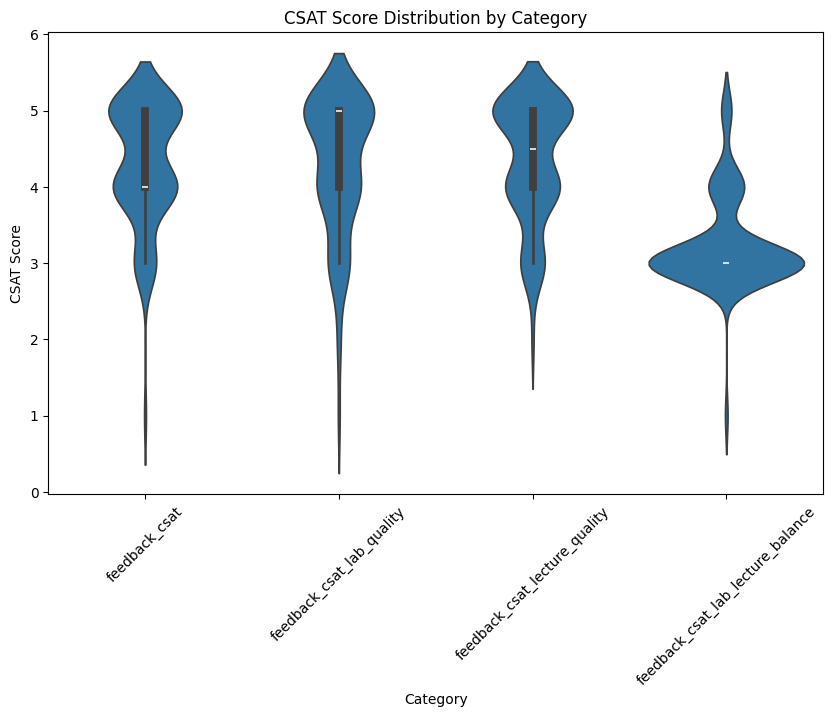

In [15]:
# Melt the DataFrame for use with Seaborn's violin plot
df_melted = df[['feedback_csat', 'feedback_csat_lab_quality', 'feedback_csat_lecture_quality', 'feedback_csat_lab_lecture_balance']].melt(var_name='Category', value_name='CSAT Score')

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='CSAT Score', data=df_melted)
plt.title('CSAT Score Distribution by Category')
plt.xticks(rotation=45)
plt.show()

## CSAT Score Pie Chart by Lab Quality

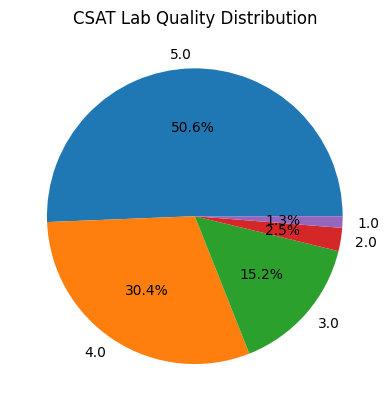

In [16]:
# Count the distribution of lab quality scores and plot
lab_quality_counts = df['feedback_csat_lab_quality'].value_counts()
lab_quality_counts.plot(kind='pie', autopct='%1.1f%%', title='CSAT Lab Quality Distribution')
plt.ylabel('')
plt.show()

## CSAT Count by Score

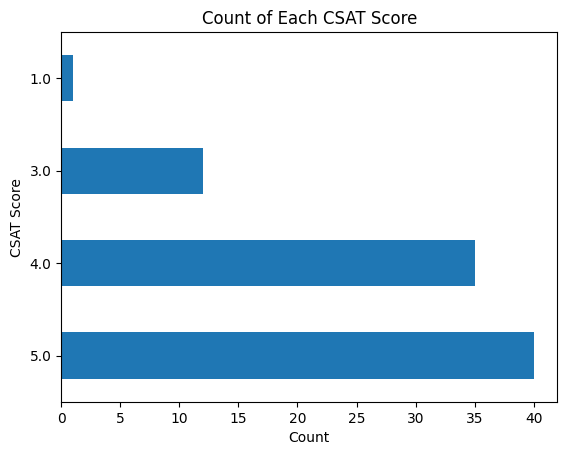

In [17]:
# Count occurrences of each CSAT score
csat_counts = df['feedback_csat'].value_counts()

# Plot the counts as a horizontal bar chart
csat_counts.plot(kind='barh', title='Count of Each CSAT Score')
plt.xlabel('Count')
plt.ylabel('CSAT Score')
plt.show()


#Time Related Charts

##Monthly CSAT Trends

<ipython-input-19-b8e9fc0abe5b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_csat_trends = df[csat_columns].resample('M').mean()


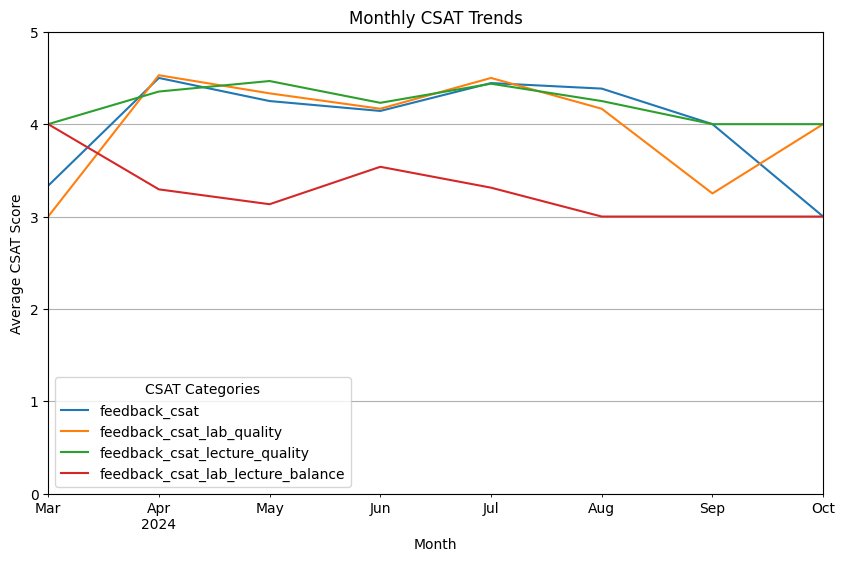

In [19]:
# Set feedback_date as the index for time-based analysis
df.set_index('feedback_date', inplace=True)

# Resample monthly and calculate mean CSAT scores per month
monthly_csat_trends = df[csat_columns].resample('M').mean()

# Plotting the monthly CSAT trends as a line chart
monthly_csat_trends.plot(figsize=(10, 6))
plt.title('Monthly CSAT Trends')
plt.xlabel('Month')
plt.ylabel('Average CSAT Score')
plt.ylim(0, 5)  # Assuming CSAT scores range from 1 to 5
plt.legend(title='CSAT Categories')
plt.grid(True)
plt.show()


## Moving Average of CSAT Scores (Rolling Line Chart)

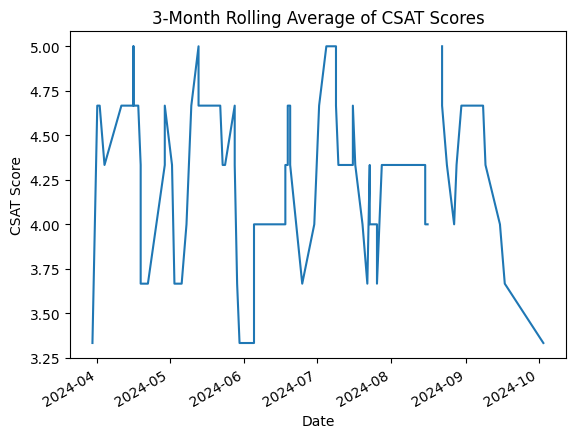

In [20]:
#Rolling CSAT Monthly Average

# Calculate a 3-month rolling average for CSAT scores
csat_rolling_avg = df['feedback_csat'].rolling(window=3).mean()

# Plotting the 3-month rolling average
plt.figure()
csat_rolling_avg.plot(title='3-Month Rolling Average of CSAT Scores')
plt.xlabel('Date')
plt.ylabel('CSAT Score')
plt.show()

##Averge CSAT by Month

Columns in DataFrame: Index(['feedback_csat', 'feedback_csat_explanation',
       'feedback_csat_lab_quality', 'feedback_csat_lecture_quality',
       'feedback_csat_open_feedback', 'feedback_csat_lab_lecture_balance'],
      dtype='object')
Column 'feedback_date' not found in the DataFrame.


<ipython-input-21-b768b4980b03>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_csat = df[csat_columns].resample('M').mean().mean(axis=1)


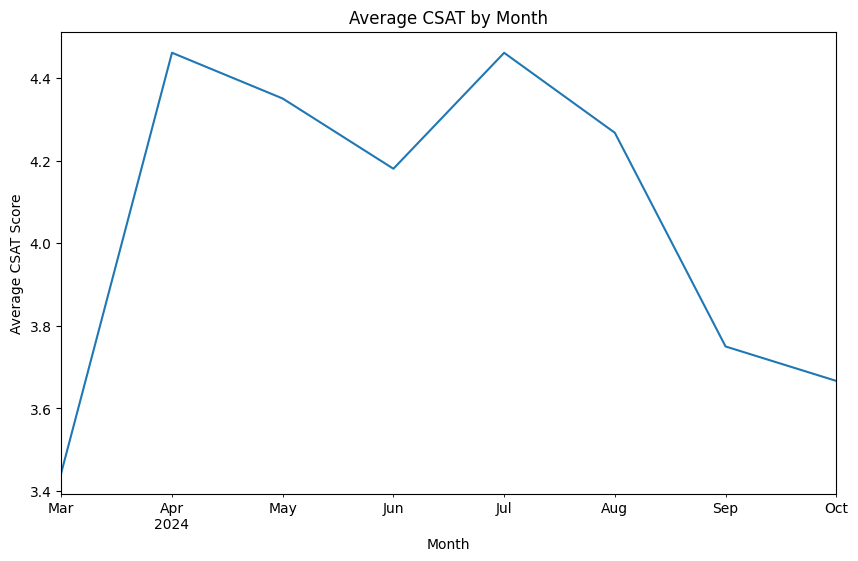

In [21]:
# List columns to confirm the date column name
print("Columns in DataFrame:", df.columns)

# Replace 'feedback_date' with the correct column name if different
date_column = 'feedback_date'  # Update this if your date column has a different name

# Convert the date column to datetime if needed and set it as the index
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime if not already
    df.set_index(date_column, inplace=True)
else:
    print(f"Column '{date_column}' not found in the DataFrame.")

# List of CSAT columns
csat_columns = ['feedback_csat', 'feedback_csat_lab_quality', 'feedback_csat_lecture_quality']

# Calculate the monthly average CSAT across all categories
monthly_average_csat = df[csat_columns].resample('M').mean().mean(axis=1)

# Plot the monthly average CSAT
monthly_average_csat.plot(kind='line', figsize=(10, 6), title='Average CSAT by Month')
plt.xlabel('Month')
plt.ylabel('Average CSAT Score')
plt.show()

#Sentiment Analysis

##Sentiment Analysis on Feedback Text

In [22]:
from textblob import TextBlob

# Analyze sentiment polarity in 'feedback_csat_explanation' and 'feedback_csat_open_feedback'
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['open_feedback_sentiment'] = df['feedback_csat_open_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check overall sentiment averages
print("Sentiment Analysis:\n", df[['explanation_sentiment', 'open_feedback_sentiment']].mean())


Sentiment Analysis:
 explanation_sentiment      0.116200
open_feedback_sentiment    0.057929
dtype: float64


##Feedback Sentiment Histogram (Sentiment Analysis Results)


Visualizing sentiment scores with a histogram provides insights into the distribution of positive and negative sentiments.

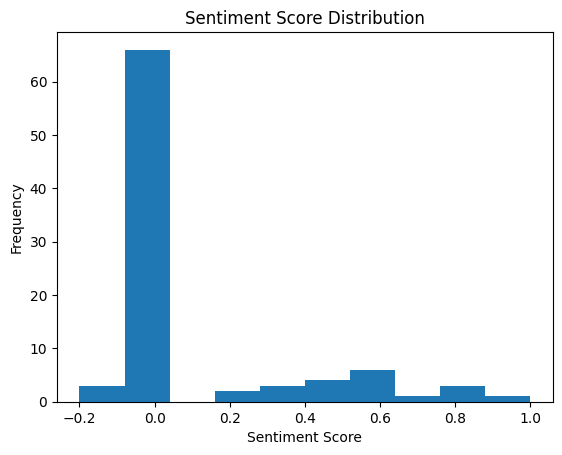

In [23]:
from textblob import TextBlob

# Generate sentiment scores
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot histogram for sentiment scores
plt.figure()
df['explanation_sentiment'].plot(kind='hist', bins=10, title='Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


##Top Words in Feedback (Bar and Pie Charts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


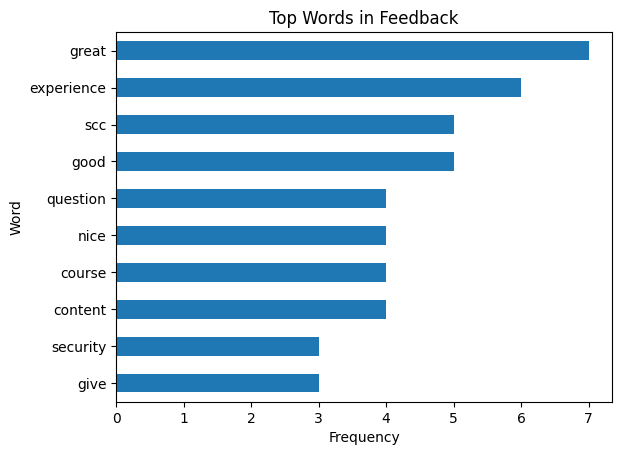

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import STOPWORDS

# Add "feedback" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.add("feedback")  # Add other domain-specific terms if needed

# Convert the stopwords set to a list
stopwords_list = list(stopwords)

# Extract common words in feedback using CountVectorizer, with custom stopwords
vectorizer = CountVectorizer(stop_words=stopwords_list, max_features=10)
word_counts = vectorizer.fit_transform(df['feedback_csat_explanation'].fillna("")).toarray()
word_counts_sum = word_counts.sum(axis=0)

# Convert to DataFrame and plot as a horizontal bar chart
common_words_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts_sum})
common_words_df.set_index('word').sort_values(by='count').plot(kind='barh', legend=None, title='Top Words in Feedback')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


<Figure size 1200x1200 with 0 Axes>

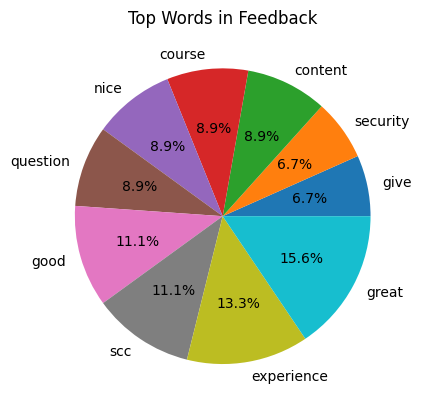

In [25]:
# Plotting the word frequency as a pie chart
plt.figure(figsize=(12, 12))
common_words_df.set_index('word').sort_values(by='count').plot(kind='pie', y='count', legend=None, autopct='%1.1f%%', title='Top Words in Feedback')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


##Sentiment Score vs. CSAT Score

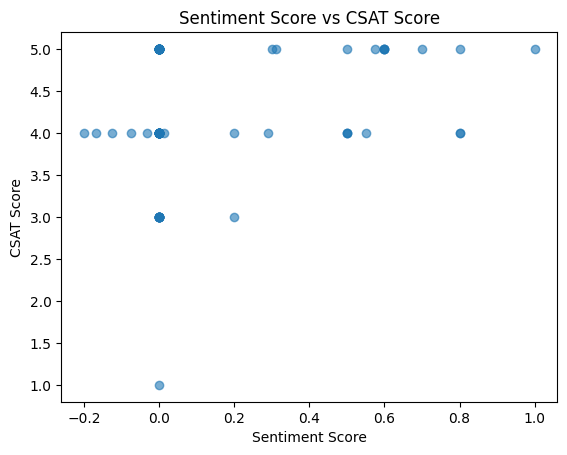

In [26]:
# Ensure sentiment analysis is done (re-run TextBlob if needed)
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment score against CSAT rating
plt.figure()
plt.scatter(df['explanation_sentiment'], df['feedback_csat'], alpha=0.6)
plt.title('Sentiment Score vs CSAT Score')
plt.xlabel('Sentiment Score')
plt.ylabel('CSAT Score')
plt.show()


##Top BiGrams in Feedback

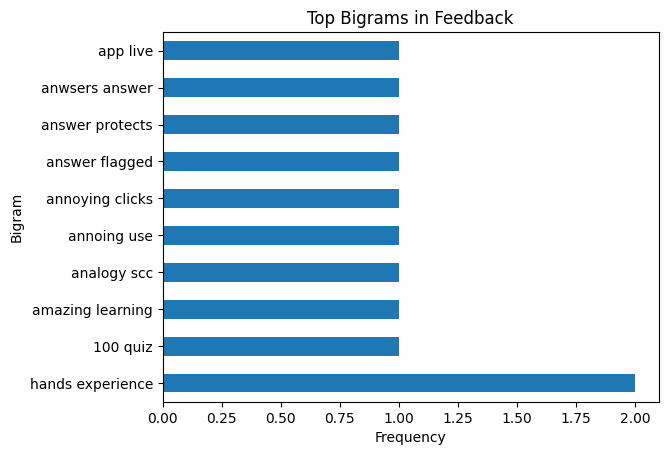

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text to find bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['feedback_csat_explanation'].fillna(""))

# Sum bigram occurrences and create DataFrame
bigram_counts = bigrams.sum(axis=0)
bigram_df = pd.DataFrame(bigram_counts.tolist()[0], index=vectorizer.get_feature_names_out(), columns=['count'])
top_bigrams = bigram_df.nlargest(10, 'count')

# Plot top bigrams as a horizontal bar chart
top_bigrams.plot(kind='barh', legend=None, title='Top Bigrams in Feedback')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


##Distribution of Sentiment Scores

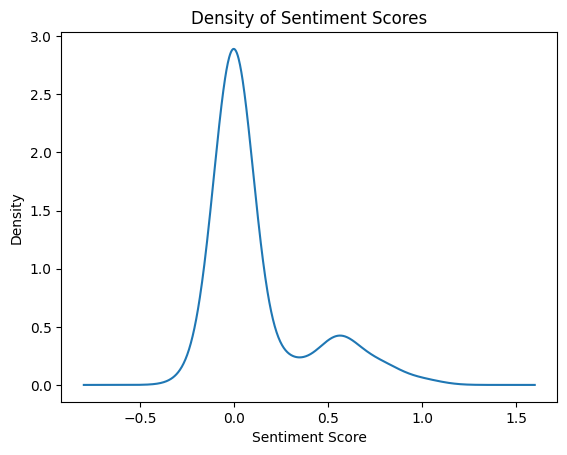

In [28]:
# Plot KDE for sentiment scores
plt.figure()
df['explanation_sentiment'].plot(kind='kde', title='Density of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()


## Word Cloud for Lab Quality Feedback: CSAT Explanations

---



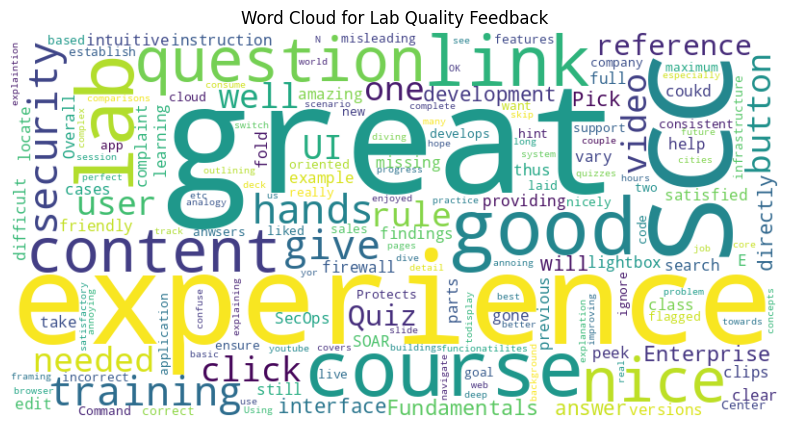

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Add "feedback" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.add("feedback")  # Add other domain-specific terms if needed

# Filter text for lab quality feedback only
lab_feedback_text = ' '.join(df[df['feedback_csat_lab_quality'].notna()]['feedback_csat_explanation'].fillna(""))

# Generate the word cloud, using the updated stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(lab_feedback_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lab Quality Feedback')
plt.show()


## Word Cloud for Lab Quality Feedback: CSAT Open Feedback

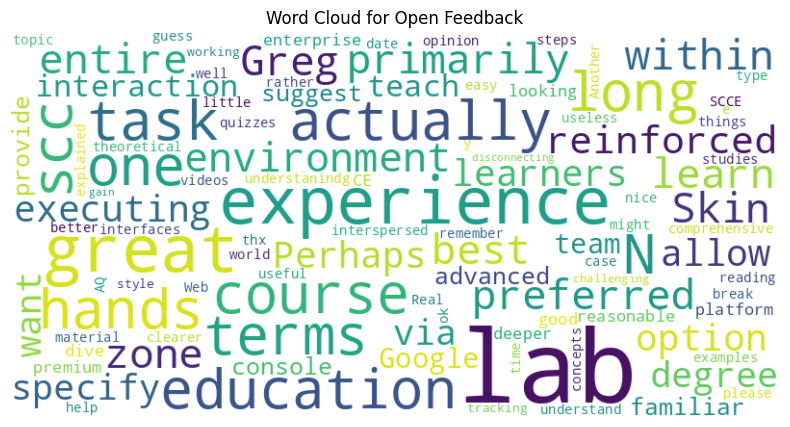

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add "feedback" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.add("feedback")  # Add other domain-specific terms if needed

# Filter text for open feedback only
lab_feedback_text = ' '.join(df[df['feedback_csat_lab_quality'].notna()]['feedback_csat_open_feedback'].fillna(""))

# Generate the word cloud, using the updated stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(lab_feedback_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Open Feedback')
plt.show()


#BERT Stuff: Sentiment Analysis - Star Ratings

###Option 1: Postive and Negative

In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the pre-trained BERT model and tokenizer for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict sentiment
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits).item()
    sentiment = "positive" if predicted_class == 1 else "negative"
    return sentiment

# Apply sentiment analysis to 'feedback_csat_explanation' and 'feedback_csat_open_feedback' columns
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: get_sentiment(str(x)))
df['open_feedback_sentiment'] = df['feedback_csat_open_feedback'].apply(lambda x: get_sentiment(str(x)))

# View the sentiment analysis results
print(df[['feedback_csat_explanation', 'explanation_sentiment', 'feedback_csat_open_feedback', 'open_feedback_sentiment']])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
...                                                          ...   
2024-09-08                                                   N.A   
2024-09-09     Give me a basic background, I hope it will giv...   
2024-09-15                                           No feedback   
2024-09-17                                           No feedback   
2024-10-03                                           No feedback   

              explanation_sentiment  \
feedback_date                         
2024-03-14                 negative  

###Option 2: Gets a Star Rating (my favorite)

In [32]:
#Get a Star Rating

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


# Load pre-trained BERT model fine-tuned for star rating
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict star rating
def get_star_rating(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_star = torch.argmax(logits).item() + 1  # Ratings are 0-indexed, so add 1
    return predicted_star

# Apply star rating to 'feedback_csat_explanation' and 'feedback_csat_open_feedback' columns
df['explanation_star_rating'] = df['feedback_csat_explanation'].apply(lambda x: get_star_rating(str(x)))
df['open_feedback_star_rating'] = df['feedback_csat_open_feedback'].apply(lambda x: get_star_rating(str(x)))

# View the star ratings
print(df[['feedback_csat_explanation', 'explanation_star_rating', 'feedback_csat_open_feedback', 'open_feedback_star_rating']])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
...                                                          ...   
2024-09-08                                                   N.A   
2024-09-09     Give me a basic background, I hope it will giv...   
2024-09-15                                           No feedback   
2024-09-17                                           No feedback   
2024-10-03                                           No feedback   

               explanation_star_rating  \
feedback_date                            
2024-03-14                     

In [33]:
# Display a sample of the DataFrame with feedback and star ratings
display_columns = ['feedback_csat_explanation', 'explanation_star_rating',
                   'feedback_csat_open_feedback', 'open_feedback_star_rating']

# Display the first few rows of the selected columns as a table
print(df[display_columns].head(10))


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
2024-04-02                           amazing learning experience   
2024-04-04     Overall this class was good, but it was missin...   
2024-04-11                                           No feedback   
2024-04-14                                           No feedback   
2024-04-15     There are some parts of the training that are ...   

               explanation_star_rating  \
feedback_date                            
2024-03-14                           1   
2024-03-29                           2   
2024-03-30     

In [34]:
#Create a summary table

# Summary table for explanation and open feedback ratings
summary_table = pd.DataFrame({
    "Mean Explanation Star Rating": [df['explanation_star_rating'].mean()],
    "Mean Open Feedback Star Rating": [df['open_feedback_star_rating'].mean()],
    "Explanation Rating Distribution": [df['explanation_star_rating'].value_counts().to_dict()],
    "Open Feedback Rating Distribution": [df['open_feedback_star_rating'].value_counts().to_dict()]
})

print(summary_table)


   Mean Explanation Star Rating  Mean Open Feedback Star Rating  \
0                      1.876404                        1.539326   

   Explanation Rating Distribution Open Feedback Rating Distribution  
0  {1: 62, 4: 9, 5: 9, 3: 6, 2: 3}         {1: 72, 3: 8, 5: 5, 4: 4}  


In [35]:
#Display Table

from tabulate import tabulate

# Using tabulate for console-based pretty print
print(tabulate(df[display_columns].head(10), headers="keys", tablefmt="pretty"))


+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------+
|    feedback_date    |                                                                                                                                                                     feedback_csat_explanation                           

In [36]:
# Define display columns with star ratings and feedback text
display_columns = ['feedback_csat_explanation', 'explanation_star_rating',
                   'feedback_csat_open_feedback', 'open_feedback_star_rating']

# Truncate long feedback text for better readability
df_wrapped = df[display_columns].copy()
df_wrapped['feedback_csat_explanation'] = df_wrapped['feedback_csat_explanation'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_wrapped['feedback_csat_open_feedback'] = df_wrapped['feedback_csat_open_feedback'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))

# Convert DataFrame to Markdown format with word wrapping
markdown_table = tabulate(df_wrapped.head(10), headers="keys", tablefmt="pipe")

print(markdown_table)


| feedback_date       | feedback_csat_explanation                          |   explanation_star_rating | feedback_csat_open_feedback                        |   open_feedback_star_rating |
|:--------------------|:---------------------------------------------------|--------------------------:|:---------------------------------------------------|----------------------------:|
| 2024-03-14 00:00:00 | No feedback                                        |                         1 | Skin zone Greg                                     |                           3 |
| 2024-03-29 00:00:00 | The UI for SCC is not very user friendly or intuit |                         2 | I learn best by doing, so I would have preferred t |                           3 |
|                     | ive and thus it was difficult to search for what l |                           | he entire education be primarily within a lab envi |                             |
|                     | inks or buttons I needed to click. T

In [37]:
# Function to predict star rating with probabilities
def get_star_rating_with_probs(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]  # Convert to list for easier viewing
    predicted_star = torch.argmax(logits).item() + 1  # Ratings are 0-indexed, so add 1
    return predicted_star, probabilities

# Apply to a sample of feedback to inspect
sample_feedback = df[['feedback_csat_explanation', 'feedback_csat_open_feedback']].head(5)
sample_feedback['explanation_star_rating'], sample_feedback['explanation_probs'] = zip(
    *sample_feedback['feedback_csat_explanation'].apply(lambda x: get_star_rating_with_probs(str(x)))
)
sample_feedback['open_feedback_star_rating'], sample_feedback['open_probs'] = zip(
    *sample_feedback['feedback_csat_open_feedback'].apply(lambda x: get_star_rating_with_probs(str(x)))
)

# View the sample feedback with predicted star ratings and probabilities
print(sample_feedback[['feedback_csat_explanation', 'explanation_star_rating', 'explanation_probs',
                       'feedback_csat_open_feedback', 'open_feedback_star_rating', 'open_probs']])


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   

               explanation_star_rating  \
feedback_date                            
2024-03-14                           1   
2024-03-29                           2   
2024-03-30                           4   
2024-04-01                           1   
2024-04-02                           1   

                                               explanation_probs  \
feedback_date                                                      
2024-03-14     [0.49443167448043823, 0.2739781141281128, 0.16...   
2024-03-29     [0.072025

In [38]:
# Define display columns with star ratings and feedback text
display_columns = ['feedback_csat_explanation', 'explanation_star_rating',
                   'feedback_csat_open_feedback', 'open_feedback_star_rating']

# Truncate long feedback text for better readability
df_wrapped = df[display_columns].copy()
df_wrapped['feedback_csat_explanation'] = df_wrapped['feedback_csat_explanation'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_wrapped['feedback_csat_open_feedback'] = df_wrapped['feedback_csat_open_feedback'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))

# Convert DataFrame to Markdown format with word wrapping
markdown_table = tabulate(df_wrapped.head(10), headers="keys", tablefmt="pipe")

print(markdown_table)

| feedback_date       | feedback_csat_explanation                          |   explanation_star_rating | feedback_csat_open_feedback                        |   open_feedback_star_rating |
|:--------------------|:---------------------------------------------------|--------------------------:|:---------------------------------------------------|----------------------------:|
| 2024-03-14 00:00:00 | No feedback                                        |                         1 | Skin zone Greg                                     |                           3 |
| 2024-03-29 00:00:00 | The UI for SCC is not very user friendly or intuit |                         2 | I learn best by doing, so I would have preferred t |                           3 |
|                     | ive and thus it was difficult to search for what l |                           | he entire education be primarily within a lab envi |                             |
|                     | inks or buttons I needed to click. T